# Plotting ARSCL Cloud Reflectivity and Velocity Fields.
---

The **Active Remote Sensing of CLouds (ARSCL) product** provides information about cloud  coverage overhead at most ARM sites.  It combines cloud radar, lidar and other observations to provide cloud reflectivity, vertical velocity in clouds, cloud layer boundaries and other quantities.

In this notebook, we'll look at cloud reflectivitiy and mean Doppler velocity to get a sense of the clouds above the COMBLE site on a selected day.

### Reading ARM netCDF data files:

There are several nice Python packages for reading netCDF data. Among them are:
 - **netCDF4**: Used in Sonde and Disdrometer notebooks
 - **xarray** *: Simplifies and streamlines accessing and plotting netCDF data (i.e., less coding!)
 - **act**: Atmospheric data Community Toolkit (based on **xarray**) See https://github.com/ARM-DOE/ACT/ for more information.  Here we use it only for reading data files, but it's useful for exploring and analyzing atmospheric time series observations.

<div class="alert alert-block alert-info"> * Xarray CAUTION: The ARM standard 'time' units conflict with what the xarray package expects. Typically this is not a problem, but in some cases, typically where a file begins during an hour other than midnight, xarray may not properly decode the file's times.  An xarray-based ACT function, 'read_netcdf,' resolves this issue.  Our notebook NB3_plot_radiation illustrates its use. (Contact Karen for more info.)
</div>

**Access Data Files from Google Colab**
*   Accessing GitHub from Google Colab
*   Accessing Local File System to Google Colab
*   Accessing Google Drive from Google Colab

**Accessing Google Drive from Google Colab**

The first step is to mount your Google Drive to your Google Colab notebook. This will allow you to access your Google Drive files directly from your notebook. To mount your Google Drive, run the following code snippet in a code cell:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Accessing Local File System to Google Colab**

Warning
Ensure that your files are saved elsewhere. This runtime's files will be eleted when this runtime is terminated.

More information about linux shell command can be found at [25 Basic Linux Commands For Beginners](https://www.geeksforgeeks.org/basic-linux-commands/#1-is-command-in-linux).

In [ ]:
!pwd # Print working directory
%ls -l # List files in working directory
%cd content/sample_data/ # Change working directory to sample_data
%pwd
%ls

***
The first step is to import **xarray** (to read our netCDF file) and **matplotlib** to help with plotting. <br> (Note that xarray works fine with the ARSCL dataset)

In [ ]:
import xarray as xr # For reading and plotting data
import matplotlib.pyplot as plt # For additional plotting functions

### netCDF data
NetCDF (network Common Data Form) is a file format designed to support the creation, access, and sharing of scientific data. It is used extensively in the atmospheric and oceanographic communities to store variables, such as temperature, pressure, wind speed, and wave height.

Data in netCDF format is:

*   Self-Describing. A netCDF file includes information about the data it contains.
*   Portable. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
*   Scalable. Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
*   Appendable. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
*   Sharable. One writer and multiple readers may simultaneously access the same netCDF file.
*   Archivable. Access to all earlier forms of netCDF data will be supported by current and future versions of the software..[More information](https://www.unidata.ucar.edu/software/netcdf/)

**netCDF data examples**

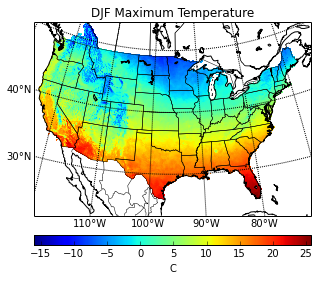

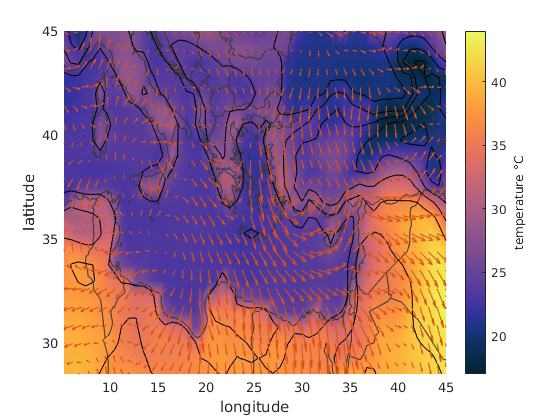

### Select and open an ARSCL file.  
Upload a day of COMBLE ARSCL file 'anxarsclkazr1kolliasM1.c1.20200313.000000.nc' to '/content/sample_data/' in your Colab temporary space.

In [ ]:
afile = '/content/sample_data/anxarsclkazr1kolliasM1.c1.20200313.000000.nc'
ds = xr.open_dataset(afile)
ds

### The '**reflectivity_best_estimate**' field

Radar reflectivity provides a measure of cloud droplet concentration as well as droplet size.  The 'best-estimate' reflectivity field we'll look at is formed by merging the KAZR cloud radar operating modes for best sensitivity and vertical coverage.  Non-significant radar detections (due to background noise) are masked out and non-hydrometeor clutter has been removed.

### Here's a first attempt at a contour plot of this reflectivity field.  
Xarray looks at the variable to determine what kind of plot is required: a line plot (for 1-dimensional data) or a contour plot for this 2D data field!  The 'vmin' and 'vmax' keywords specify the min and max colormap values desired.

In [ ]:
rbe = ds['reflectivity_best_estimate']

rbe.plot(cmap='jet', vmin=-60, vmax=20)

In [ ]:
print(rbe.values[1:3,1:3])


The first problem is that the axes are swapped.  We'll address that next.  But do **note the nice axis labels, tick mark labeling and colormap labeling that 'comes for free' with xarray datasets!**

### To reorient the plot axes, specify the axis ordering in the plot call so that our desired x-axis is specified first (alternatively, we could transpose the rbe dataarray)
2. Limit the height axis range since the hydrometeors are confined to the lowest 6 km or so.
3. Alter the plot aspect ratio.
4. Provide a nice image title.

In [ ]:
aspect = 4 # aspect ratio width/height

rbe.plot(x=rbe.dims[0], y=rbe.dims[1], ylim=[0,6000], aspect=aspect, size=3, cmap='jet', vmin=-60, vmax=20)
# Add my preferred title, with yyyymmdd of file
yyyymmdd = ds.base_time.string.split()[0]
x = plt.title('Reflectivity Best Estimate' + ' ' + yyyymmdd)

### There are a lot of clouds on this day and we can't really see that much.

Let's zoom in on a specific time to get a better view, specifically from 8 am to 2 pm (8Z to 14Z) 
- **sel**: specifies values of the coordinate to select
- **isel**: specified ordinal coordinate indices to select

We also select a specific height range. If we want we could omit ylim in the following plotting routines. 


In [ ]:
start_time = '2020-03-13T08:00:00'
end_time = '2020-03-13T14:00:00'
bottom_height = 0 # m
top_height = 6000 # m

rbe_zoom = rbe.sel(time=slice(start_time,end_time)).sel(height=slice(bottom_height,top_height))
# rbe_zoom = rbe.isel(time=slice(7200,12600)).isel(height=slice(0,195))

### We can use the same code as before but now we plot rbe_zoom instead of rbe 

In [ ]:
rbe_zoom.plot(x=rbe_zoom.dims[0], y=rbe_zoom.dims[1],  aspect=aspect, size=3, cmap='jet', vmin=-60, vmax=20)
plt.title('Reflectivity Best Estimate' + ' ' + yyyymmdd)

### We can easily add the lowest cloud base, as seen by lidar.

Just add an additional line of code, to plot the 'cloud_base_best_estimate' for the zoomed in time

In [ ]:
rbe_zoom.plot(x=rbe_zoom.dims[0], y=rbe_zoom.dims[1], aspect=aspect, size=3, cmap='jet', vmin=-60, vmax=20)
plt.title('Reflectivity Best Estimate' + ' ' + yyyymmdd)
cbbe = ds['cloud_base_best_estimate']
cbbe_zoom = cbbe.sel(time=slice(start_time,end_time))
cbbe_zoom.plot(linestyle='none',marker='.', color='k')

### Now, we'll take a look at the **mean Doppler velocity** field

In [ ]:
mdv = ds['mean_doppler_velocity']
mdv_zoom = mdv.sel(time=slice(start_time,end_time)).sel(height=slice(bottom_height,top_height))

### Now, we'll plot this velocity field, this time using the 'seismic' color map.  
BTW, here is a link to other available **matplotlib color maps**:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
mdv_zoom.plot(x=mdv_zoom.dims[0], y=mdv_zoom.dims[1], aspect=aspect, size=3, cmap='seismic', vmin=-5, vmax=5)
# Add my preferred title, with yyyymmdd of file
plt.title('Mean Doppler Velocity' + ' ' + yyyymmdd)

# Prerequisite
[NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)

[Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html)


[Introduction to Xarray](https://arm-development.github.io/arm-summer-school-2024/tutorials/xarray/xarray-intro.html)


[ACT Basics](https://arm-development.github.io/arm-summer-school-2024/tutorials/act/act_tutorial_comble.html)

# Deep Dive

[Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html)

[Intermediate NumPy](https://foundations.projectpythia.org/core/numpy/intermediate-numpy.html)